 # **7 Linear Regression with TensorFlow using the California Housing Dataset**
The goal of this exercise is to implement a linear regression model using TensorFlow to predict house prices based on the California Housing Dataset. The dataset contains various features such as average income, housing average age, and more. Your task is to build a linear regression model and evaluate its performance.

1. Import the required libraries:

> Bloque con sangría



In [1]:
#importamos la libreria de tensoflow, pandas y sklearn para la dataset
import tensorflow as tf
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


2. Load the California Housing Dataset

In [2]:
#cargamos nuestra dataset california housing
raw = fetch_california_housing()
#separamos en X donde se almacena las variables las cuales nos van a servir para el entrenamiento
X = pd.DataFrame(data=raw['data'], columns=raw['feature_names'])
X



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [3]:
# mientras la y es nuestra variable a predecir
y = pd.Series(raw['target'])
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

**Preprocess the data**

3. Normalize the features using the mean and standard deviation.

In [4]:
# se utilizará para normalizar las características utilizando la media y la desviación estándar.
scaler = StandardScaler()
# Aplicamos el método fit_transform del escalador a la matriz de características X para normalizar las características y almacenar las características normalizadas en X_scaled
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

4. Split the dataset into training and testing sets (e.g., 80% for training, 20% for testing).

In [5]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
X_train

array([[-0.32165429,  0.34647803, -0.16625886, ...,  0.05980847,
        -1.36797628,  1.26764451],
       [-0.03061993,  1.61780729, -0.3861807 , ..., -0.12830597,
        -0.87169852,  0.7036268 ],
       [ 0.1503488 , -1.95780625,  0.08764093, ..., -0.03345346,
        -0.45501247, -0.45435647],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

In [7]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Length: 4128, dtype: float64

**Define the TensorFlow graph**

**1. Create placeholders for the input features (X) and target variable (y).**


In [8]:
#Creamos los placeholders para X y y
nf=X_train.shape[1]
X_placeholder = tf.placeholder(shape=(None, nf), dtype=tf.float32)
y_placeholder = tf.placeholder(shape=(None), dtype=tf.float32)

In [9]:
X_placeholder

<tf.Tensor 'Placeholder:0' shape=(?, 8) dtype=float32>

In [10]:
y_placeholder

<tf.Tensor 'Placeholder_1:0' shape=<unknown> dtype=float32>

**2. Create variables for the model's weights (W) and bias (b).**

In [11]:
##Creamos las variables del peso W y del bias
W = tf.Variable(tf.random_normal(shape=(nf, 1)), name='weights')
b = tf.Variable(tf.zeros(shape=(1,)), name='bias')

In [12]:
W

<tf.Variable 'weights:0' shape=(8, 1) dtype=float32_ref>

In [13]:
b

<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>

**3. Define the linear regression model using the equation: y_pred = X * W + b**

In [14]:
#Definimos el modelo de regresion lineal con su ecuacion
y_pred = tf.matmul(X_placeholder, W) + b

In [15]:
#imprimimos
y_pred

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

**4. Define the loss function as the mean squared error between the predicted values and the true values.**

In [16]:
# definimos la funcion de perdida
loss = tf.reduce_mean(tf.square(y_pred - y_placeholder))

In [17]:
#imprimimos
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

**5. Choose an optimizer (e.g., Gradient Descent) to minimize the loss function.**

In [18]:
#Escogemos una optimizacion para la minimizar la funcion de perdida
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

In [19]:
#imprimimos
train_op

<tf.Operation 'GradientDescent' type=NoOp>

# **Train the model**

**1. Initialize TensorFlow session.**

**2. Initialize the model's variables.**

**3. Set the number of training epochs and the learning rate.**

**4. For each epoch, iterate through the training dataset and update the model's parameters using the optimizer.**

**5. Print the training loss at regular intervals.**

In [20]:
#Iicializamos las epocas y el learning rate para el entrenamiento
num_epochs = 150
batch_size = 32
train_loss_history = []
val_loss_history = []

#Inicializamos las variables del modelo
init = tf.global_variables_initializer()
#Inicializamos la sesion  de Tensorflow
with tf.Session() as sess:
    sess.run(init)
    #Para cada época, iterar a través del conjunto de datos de entrenamiento y
    #actualizar los parámetros del modelo utilizando el optimizador.
    for epoch in range(num_epochs):
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i+batch_size]
            y_batch = y_train[i:i+batch_size]
            sess.run(train_op, feed_dict={X_placeholder: X_batch, y_placeholder: y_batch})

        train_loss = sess.run(loss, feed_dict={X_placeholder: X_train, y_placeholder: y_train})
        val_loss = sess.run(loss, feed_dict={X_placeholder: X_test, y_placeholder: y_test})
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        #Imprimir la pérdida de entrenamiento en intervalos regulares.
        if epoch % 1.5 == 0:
            print(f'Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}')

    y_pred_test = sess.run(y_pred, feed_dict={X_placeholder: X_test})


Epoch 0: Training Loss = 2.0841, Validation Loss = 2.1500
Epoch 3: Training Loss = 1.3892, Validation Loss = 1.3880
Epoch 6: Training Loss = 1.3716, Validation Loss = 1.3607
Epoch 9: Training Loss = 1.3613, Validation Loss = 1.3451
Epoch 12: Training Loss = 1.3543, Validation Loss = 1.3347
Epoch 15: Training Loss = 1.3494, Validation Loss = 1.3276
Epoch 18: Training Loss = 1.3461, Validation Loss = 1.3228
Epoch 21: Training Loss = 1.3437, Validation Loss = 1.3194
Epoch 24: Training Loss = 1.3420, Validation Loss = 1.3171
Epoch 27: Training Loss = 1.3408, Validation Loss = 1.3155
Epoch 30: Training Loss = 1.3400, Validation Loss = 1.3143
Epoch 33: Training Loss = 1.3394, Validation Loss = 1.3135
Epoch 36: Training Loss = 1.3389, Validation Loss = 1.3130
Epoch 39: Training Loss = 1.3386, Validation Loss = 1.3126
Epoch 42: Training Loss = 1.3383, Validation Loss = 1.3123
Epoch 45: Training Loss = 1.3382, Validation Loss = 1.3121
Epoch 48: Training Loss = 1.3380, Validation Loss = 1.3119
E

# **Evaluate the model**

**1. Use the trained model to make predictions on the test dataset.**



In [21]:
#Utiliza el modelo entrenado para hacer predicciones en el conjunto de datos de prueba.
from tabulate import tabulate
# Reshape the arrays to be 1-dimensional
y_test = y_test.values.flatten()
y_pred_test = y_pred_test.flatten()

# Print the true labels and predicted labels in a table
results_table = pd.DataFrame({'True Label': y_test[:10], 'Predicted Label': y_pred_test[:10]})
print(tabulate(results_table, headers='keys'))

      True Label    Predicted Label
--  ------------  -----------------
 0       0.477              2.02781
 1       0.458              2.0607
 2       5.00001            2.0889
 3       2.186              2.0974
 4       2.78               2.08554
 5       1.587              2.07199
 6       1.982              2.08718
 7       1.575              2.07238
 8       3.4                2.10354
 9       4.466              2.12572


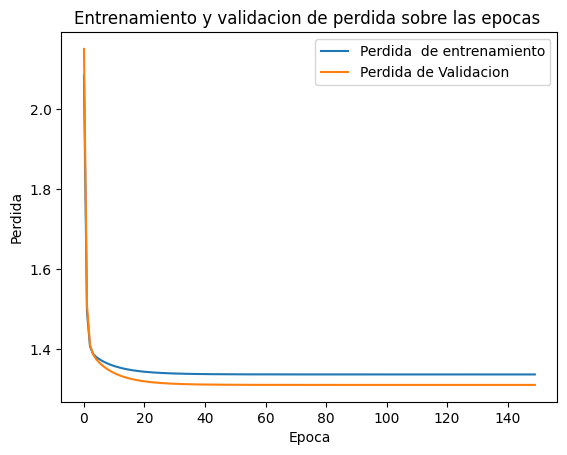

In [22]:
#Grafico del entrenamiento de perdidad
import matplotlib.pyplot as plt

epochs = range(0, num_epochs, 1)
plt.plot(epochs, train_loss_history, label='Perdida  de entrenamiento')
plt.plot(epochs, val_loss_history, label='Perdida de Validacion')
plt.xlabel('Epoca')
plt.ylabel('Perdida')
plt.title('Entrenamiento y validacion de perdida sobre las epocas ')
plt.legend()
plt.show()


**2. Calculate the mean squared error (MSE) between the predicted and true values.**

In [23]:
#Calcula el error cuadrático medio (MSE) entre los valores predichos y los valores verdaderos.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred_test)


**3. Print the MSE as a measure of the model's performance.**

In [24]:
#Imprimimos el MSE
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Squared Error (MSE): 1.2604
